## 2 Parameter Linear Fit

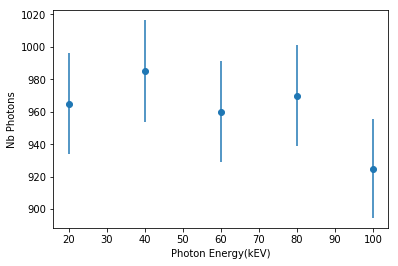

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

x = np.arange(20, 120, 20)
# Note: There are 2 different values for y in the slides
# y = np.array([940, 1010, 960, 955, 890])  # Observed Values
y = np.array([965, 985, 960, 970, 925])     # Observed Values
e = np.sqrt(y)                              # Uncertainty

fig, ax = plt.subplots()
plt.plot(linestyle="None")
ax.errorbar(x, y, e, linestyle='None', marker='o')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.show()



## Linear Model

In [3]:
def linear_model(a, b, photon_energy):
    """Linear Model

    Args:
        a: Slope
        photon_energy: Observed photon energy.

    Returns:
        Value from the linear function.
    """
    return (a * photon_energy) + b

## Minimizing Function

In [4]:
def minimizing_function(a, b, photon_energy, observed_values):
    """Chi Squared Minimizing Function

    Args:
        a: Slope
        b: Intercept
        photon_energy: Array of energy observed
        observed_values: Array of number of observed photons.

    Returns:
        Value from the chi squared function.
    """
    value = 0
    for i, observed_value in enumerate(observed_values):
        predicated_value = linear_model(a, b, photon_energy[i])  # Retrieve the value for the predicted value from the model
        value = value + np.square((observed_value - predicated_value) / np.sqrt(observed_value))
    return value

In [5]:
import sys

possible_minimum_a = np.arange(-.8, -.6, .1)  # Generate values to brute force a
possible_minimum_b = np.arange(900, 1100, 1)  # Generate values to brute force b
minimum = sys.maxsize                            # Set the max size so any value will be less than the minimum
minimum_a = 0                                    # Keep track of the minimum a value used
minimum_b = 0                                    # Keep track of the minimum a value used

for i in possible_minimum_a:
    for j in possible_minimum_b:
        temp_min = minimizing_function(i, j, x, y)
        if temp_min < minimum:
            minimum = temp_min
            minimum_a = i
            minimum_b = j

print("Minimum Chi-Squared Value: %s" % minimum)
print("Minimum A Value: %s" % minimum_a)
print("Minimum B Value: %s" % minimum_b)

Minimum Chi-Squared Value: 1.17205718302
Minimum A Value: -0.6
Minimum B Value: 997


## Reconstructed Spectrum

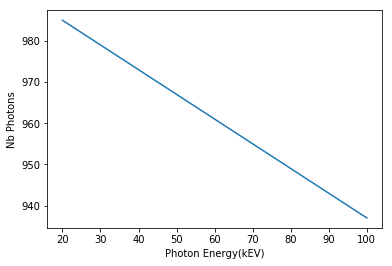

In [6]:
a = np.arange(20, 120, 20)
b = np.empty([len(a)]) 
for i, value in enumerate(a):
    b[i] = linear_model(minimum_a, minimum_b, value)

fig, ax = plt.subplots()
plt.plot(a, b)
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.show()

## Fitted Linear Model

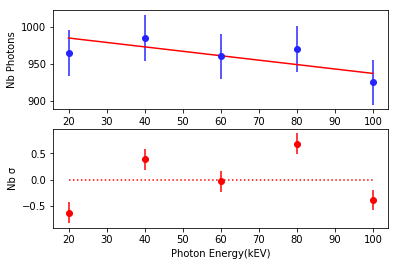

In [7]:
plt.subplot(211)  # the first subplot in the first figure
plt.plot(a, b, color='red')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.errorbar(x, y, e, linestyle='None', color='#2524fc', marker='o')

# Standard Deviations
std = (y - b) / np.sqrt(b)
err_calc = ((b * (np.sqrt(b) + 1) / np.sqrt(b)) - b)  # Calculates the value of 1 std

plt.subplot(212)  # the first subplot in the first figure
plt.errorbar(x, std, yerr=.2, linestyle='None', color='red', marker='o')
plt.plot(x, [0, 0, 0, 0, 0], linestyle='dotted', color='red')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb σ')
plt.show()

## Generate Fake Data

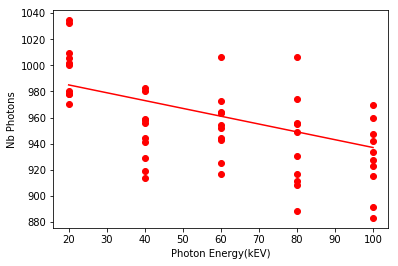

In [8]:
generated_data_size = 10
minimum_number_photons = linear_model(minimum_a, minimum_b, x)

# 2-D Array to store the generated normal distributions for each point
generated_data = np.zeros([len(minimum_number_photons), generated_data_size])
generated_data_x_ticks = np.zeros([len(minimum_number_photons), generated_data_size])

for i, data in enumerate(minimum_number_photons):
    # Normal Distribution for each point
    generated_data[i] = np.random.normal(data, size=generated_data_size, scale=err_calc[i])
    generated_data_x_ticks[i] = np.repeat(x[i], generated_data_size)
    plt.plot(generated_data_x_ticks[i], generated_data[i], linestyle='None', color='red', marker='o')

# Linear Model
plt.plot(a, b, color='red')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.show()

## Chi Squared Fit

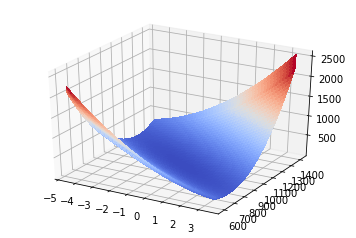

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

for i in range(generated_data_size):
    generated_obs = np.zeros(len(x))
    for j, data in enumerate(generated_data):
        generated_obs[j] = data[i]
    
    # possible_minimum_a = np.arange(-2.6, 1.5, .1)  # Generate values to brute force a
    # possible_minimum_b = np.arange(970, 1010, 1)    # Generate values to brute force b

    possible_minimum_a = np.arange(-4.6, 3.5, .01)  # Generate values to brute force a
    possible_minimum_b = np.arange(600, 1410, .1)    # Generate values to brute force b
    a_values = np.arange(-4.6, 3.5, .01)            # Copy the array instead of generating a zero one
    b_values = np.arange(600, 1410, .1)              # Copy the array instead of generating a zero one
    
    AA, BB = np.meshgrid(a_values, b_values)
    
    res_values = np.zeros(shape=(possible_minimum_a.size, possible_minimum_b.size))
    minimum = sys.maxsize                           # Set the max size so any value will be less than the minimum
    minimum_a = 0                                   # Keep track of the minimum a value used
    minimum_b = 0                                   # Keep track of the minimum a value used
    
    for j, a_val in enumerate(possible_minimum_a):
        counter = 0
        for z, b_val in enumerate(possible_minimum_b):
            temp_min = minimizing_function(a_val, b_val, x, generated_obs)
            a_values[j] = a_val
            b_values[z] = b_val
            res_values[j, z] = temp_min
            counter = counter + 1

            if temp_min < minimum:
                minimum = temp_min
                minimum_a = a_val
                minimum_b = b_val
    ax = plt.gca(projection='3d')    
    ax.plot_surface(AA, BB, np.transpose(res_values), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [ ]:
print(minimum_a)
print(minimum_b)